<a href="https://colab.research.google.com/github/tzikos/Predict-Copenhagen-Apartment-Prices/blob/main/regression_a_02450.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [13]:
df = pd.read_csv('/content/preprocessed_log_data.csv')

# Display the first few rows of the dataframe
df.head()

,housing_type,size_sqm,rooms,floor,furnished,roommate_friendly,pets_allowed,elevator,senior_friendly,students_only,...,area,availability_in,days_on_website,student_affordable,months_on_website,monthly_rent_log,monthly_aconto_log,deposit_log,prepaid_rent_log,total_monthly_rent_log
0,Lejlighed,86.0,3,3,Ja,Nej,Nej,Nej,Nej,Nej,...,Frederiksberg C,<1 month,10.0,False,<1 month,9.461177,7.208600,10.559737,0.000000,9.561068
1,Lejlighed,113.0,4,4,Nej,Nej,Ja,Ja,Nej,Nej,...,Bagsværd,1-3 months,10.0,False,<1 month,9.661480,7.110696,10.760050,9.661480,9.736547
2,Værelse,9.0,1,0,Ja,Ja,Nej,Nej,Nej,Nej,...,Kastrup,1-3 months,10.0,True,<1 month,8.517393,6.908755,9.615872,0.000000,8.699681
3,Værelse,14.0,1,0,Ja,Ja,Nej,Nej,Nej,Nej,...,København S,1-3 months,10.0,True,<1 month,8.160804,6.216606,8.294300,8.160804,8.294300
4,Værelse,7.0,1,4,Ja,Nej,Nej,Ja,Nej,Ja,...,København V,<1 month,10.0,True,<1 month,8.444838,0.000000,9.137877,0.000000,8.444838


>**Target variable:** The variable that we aim to predict in this analysis is  `total_monthly_rent` \\
On the other hand, **the predictors (dependent variables)** are the other variables in the dataset, such as: `monthly_rent`, `monthly_aconto`, `housing_type`, `size_sqm`, `rooms`, `floor`, `furnished`, `roommate_friendly`, `pets_allowed`, `elevator`, `senior_friendly`, `students_only`, `balcony_terrace`, `parking`, `dishwasher`, `washing_machine`, `charging_station`, `dryer`, `deposit`, `prepaid_rent`, `energy_mark`, `area`, `availability_in`, `days_on_website`, `student_affordable`, and `months_on_website`.


>**Purpose of Regression:** The goal is to predict the total monthly rent based on various features of the property as we listed above. This can help in understanding the factors that influence rent prices and assist in setting competitive rental prices.


In [14]:
# Dropping the columns that are used to create total_monthly_rent_log
df.drop(columns=['monthly_rent_log', 'monthly_aconto_log'], inplace=True)

In [36]:
# Convert 'months_on_website' and 'availability_in' to a categorical variable
df['months_on_website'] = df['months_on_website'].astype(str)
df['availability_in'] = df['availability_in'].astype(str)

In [37]:
# Splitting the data into features and target for regression
X_reg_no_dummies = df.drop(columns=['total_monthly_rent_log']).copy()
y_reg = df['total_monthly_rent_log'].copy()

In [38]:
# Splitting the data into features and target for classification
X_cls_no_dummies = df.drop(columns=['months_on_website']).copy()
y_cls = df['months_on_website'].copy()
# Make the categorical variables into dummies
X_reg = pd.get_dummies(X_reg_no_dummies)
X_cls = pd.get_dummies(X_cls_no_dummies)

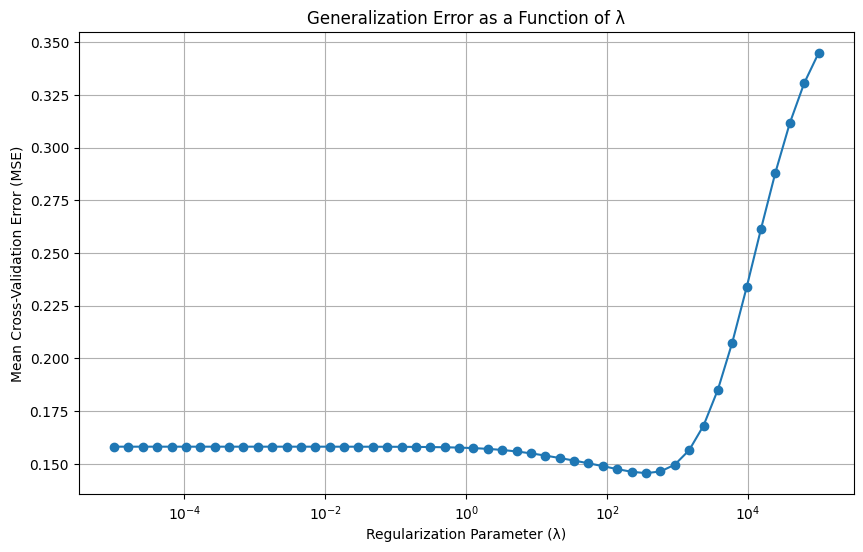

Best λ: 355.64803062231283


In [69]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Define a range of lambda (α) values in logarithmic scale
lambda_range = np.logspace(-5, 5, 50)
cv_errors = []

# Loop over each lambda and perform cross-validation
for alpha in lambda_range:
    # Standardize features to mean 0, standard deviation 1
    scaler = StandardScaler()
    X_reg_scaled = scaler.fit_transform(X_reg)
    ridge_model = Ridge(alpha=alpha)
    neg_mse = cross_val_score(ridge_model, X_reg_scaled, y_reg, cv=10, scoring='neg_mean_squared_error')
    cv_errors.append(-np.mean(neg_mse))  # Convert to positive MSE

# Plot the generalization error as a function of λ
plt.figure(figsize=(10, 6))
plt.plot(lambda_range, cv_errors, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('Mean Cross-Validation Error (MSE)')
plt.title('Generalization Error as a Function of λ')
plt.grid(True)
plt.show()

# Identify the best λ value with the lowest cross-validation error
best_lambda = lambda_range[np.argmin(cv_errors)]
print(f'Best λ: {best_lambda}')


In [70]:
# Fit the final model with the best λ
best_ridge_model = Ridge(alpha=best_lambda)
best_ridge_model.fit(X_reg_scaled, y_reg)

# Retrieve coefficients and interpret the influence of each feature
coefficients = best_ridge_model.coef_
feature_names = X_reg.columns
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coeff_df_sorted = coeff_df.sort_values(by='Coefficient', key=abs, ascending=False)

print("Top features impacting the model:")
print(coeff_df_sorted.head(10))  # Display top 10 most impactful features


Top features impacting the model:
                Feature  Coefficient
5           deposit_log     0.191365
0              size_sqm     0.138749
1                 rooms     0.095515
4    student_affordable    -0.069614
39  charging_station_Ja     0.046609
91           area_Valby     0.045129
65        area_Glostrup    -0.036550
6      prepaid_rent_log     0.034816
80     area_København V     0.027644
75     area_København K     0.027053
